In [ ]:
# Visualizando a convergência do custo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(custo_1feature)
plt.title('Convergência - 1 Feature')
plt.xlabel('Iterações (x1000)')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
plt.plot(custo_h2)
plt.title('Convergência - 3 Features')
plt.xlabel('Iterações (x1000)')
plt.ylabel('Custo')
plt.tight_layout()
plt.show()

In [ ]:
class LinearRegression:
    """
    Implementação de Regressão Linear com Descida de Gradiente.
    
    Parâmetros:
    -----------
    alpha : float, default=0.001
        Taxa de aprendizado
    n_iteracoes : int, default=100000
        Número de iterações para descida de gradiente
    verbose : bool, default=False
        Se True, imprime progresso durante treinamento
    history_step : int, default=1000
        Intervalo para salvar histórico de custo
    """
    
    def __init__(self, alpha=0.001, n_iteracoes=100000, verbose=False, history_step=1000):
        self.alpha = alpha
        self.n_iteracoes = n_iteracoes
        self.verbose = verbose
        self.history_step = history_step
        self.theta = None
        self.cost_history = []
        self.n_features_ = None
        self.training_completed = False
        
    def fit(self, X, y):
        """
        Treina o modelo usando descida de gradiente.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Features de treinamento
        y : array-like, shape (n_samples,)
            Valores alvo
            
        Retorna:
        --------
        self : object
        """
        # Converter para numpy arrays
        X = np.asarray(X)
        y = np.asarray(y)
        
        # Reshape se necessário
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        m = len(X)
        self.n_features_ = X.shape[1]
        
        # Adicionar coluna de 1s para bias
        X_bias = np.c_[np.ones((m, 1)), X]
        
        # Inicializar theta
        self.theta = np.zeros(self.n_features_ + 1)
        self.cost_history = []
        
        # Descida de gradiente
        for i in range(self.n_iteracoes):
            # Predições
            predictions = X_bias @ self.theta
            
            # Erros
            errors = predictions - y
            
            # Custo
            cost = (1/(2*m)) * np.sum(errors**2)
            
            # Gradientes
            gradients = (1/m) * X_bias.T @ errors
            
            # Atualizar parâmetros
            self.theta = self.theta - self.alpha * gradients
            
            # Salvar histórico
            if i % self.history_step == 0:
                self.cost_history.append(cost)
                if self.verbose:
                    print(f"Iteração {i}: Custo = {cost:.4f}")
                    
        self.training_completed = True
        return self
        
    def predict(self, X):
        """
        Faz predições usando o modelo treinado.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Features para predição
            
        Retorna:
        --------
        predictions : array, shape (n_samples,)
            Valores preditos
        """
        if not self.training_completed:
            raise ValueError("Modelo ainda não foi treinado. Use fit() primeiro.")
            
        X = np.asarray(X)
        
        # Reshape se necessário
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        # Adicionar coluna de 1s
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        return X_bias @ self.theta
        
    def score(self, X, y):
        """
        Calcula o coeficiente de determinação R².
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Features de teste
        y : array-like, shape (n_samples,)
            Valores alvo verdadeiros
            
        Retorna:
        --------
        r2 : float
            Coeficiente R²
        """
        y_pred = self.predict(X)
        y = np.asarray(y)
        
        # Soma dos quadrados totais
        ss_total = np.sum((y - y.mean())**2)
        
        # Soma dos quadrados dos resíduos
        ss_residual = np.sum((y - y_pred)**2)
        
        # R²
        r2 = 1 - (ss_residual / ss_total)
        
        return r2
        
    def get_params(self):
        """
        Retorna os parâmetros do modelo (theta).
        
        Retorna:
        --------
        dict : Dicionário com bias e coeficientes
        """
        if not self.training_completed:
            raise ValueError("Modelo ainda não foi treinado.")
            
        params = {
            'bias': self.theta[0],
            'coefficients': self.theta[1:]
        }
        
        return params
        
    def mse(self, X, y):
        """
        Calcula o erro quadrático médio.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Features
        y : array-like, shape (n_samples,)
            Valores alvo
            
        Retorna:
        --------
        mse : float
            Erro quadrático médio
        """
        y_pred = self.predict(X)
        y = np.asarray(y)
        return np.mean((y - y_pred)**2)
        
    def rmse(self, X, y):
        """
        Calcula a raiz do erro quadrático médio.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Features
        y : array-like, shape (n_samples,)
            Valores alvo
            
        Retorna:
        --------
        rmse : float
            Raiz do erro quadrático médio
        """
        return np.sqrt(self.mse(X, y))
        
    def plot_convergence(self):
        """
        Plota o gráfico de convergência do custo.
        """
        if not self.cost_history:
            raise ValueError("Nenhum histórico de custo disponível.")
            
        plt.figure(figsize=(10, 6))
        plt.plot(self.cost_history)
        plt.title('Convergência do Custo durante Treinamento')
        plt.xlabel(f'Iterações (x{self.history_step})')
        plt.ylabel('Custo')
        plt.grid(True)
        plt.show()

In [ ]:
# Testando a classe com hipótese 1 (1 feature)
print("=== Teste da classe LinearRegression com 1 feature ===")

# Criar e treinar modelo
model = LinearRegression(alpha=0.001, n_iteracoes=100000, verbose=False)
model.fit(X_train, Y_train)

# Obter parâmetros
params = model.get_params()
print(f"Parâmetros aprendidos:")
print(f"  Bias (theta0): {params['bias']:.4f}")
print(f"  Coeficiente (theta1): {params['coefficients'][0]:.4f}")

# Comparar com implementação original
print(f"\nComparação com implementação original:")
print(f"  Theta0 original: {theta0:.4f}")
print(f"  Theta1 original: {theta1:.4f}")

# Métricas
print(f"\nMétricas no conjunto de teste:")
print(f"  MSE: {model.mse(X_test, Y_test):.4f}")
print(f"  RMSE: {model.rmse(X_test, Y_test):.4f}")
print(f"  R²: {model.score(X_test, Y_test):.4f}")

# Plotar convergência
model.plot_convergence()

In [ ]:
class Normalizer:
    """
    Classe para normalização de features.
    
    Parâmetros:
    -----------
    method : str, default='minmax'
        Método de normalização: 'minmax' ou 'zscore'
    """
    
    def __init__(self, method='minmax'):
        if method not in ['minmax', 'zscore']:
            raise ValueError("method deve ser 'minmax' ou 'zscore'")
        self.method = method
        self.params_ = {}
        self.is_fitted = False
        
    def fit(self, X):
        """
        Calcula os parâmetros de normalização.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Dados para calcular parâmetros
            
        Retorna:
        --------
        self : object
        """
        X = np.asarray(X)
        
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        n_features = X.shape[1]
        
        if self.method == 'minmax':
            self.params_['min'] = X.min(axis=0)
            self.params_['max'] = X.max(axis=0)
            self.params_['range'] = self.params_['max'] - self.params_['min']
            # Evitar divisão por zero
            self.params_['range'][self.params_['range'] == 0] = 1
        else:  # zscore
            self.params_['mean'] = X.mean(axis=0)
            self.params_['std'] = X.std(axis=0)
            # Evitar divisão por zero
            self.params_['std'][self.params_['std'] == 0] = 1
            
        self.is_fitted = True
        return self
        
    def transform(self, X):
        """
        Aplica a normalização aos dados.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Dados para normalizar
            
        Retorna:
        --------
        X_normalized : array, shape (n_samples, n_features)
            Dados normalizados
        """
        if not self.is_fitted:
            raise ValueError("Normalizer ainda não foi ajustado. Use fit() primeiro.")
            
        X = np.asarray(X)
        original_shape = X.shape
        
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        if self.method == 'minmax':
            X_normalized = (X - self.params_['min']) / self.params_['range']
        else:  # zscore
            X_normalized = (X - self.params_['mean']) / self.params_['std']
            
        # Retornar na forma original se era 1D
        if len(original_shape) == 1:
            X_normalized = X_normalized.ravel()
            
        return X_normalized
        
    def fit_transform(self, X):
        """
        Ajusta o normalizador e transforma os dados em uma única etapa.
        
        Parâmetros:
        -----------
        X : array-like, shape (n_samples, n_features)
            Dados para ajustar e normalizar
            
        Retorna:
        --------
        X_normalized : array, shape (n_samples, n_features)
            Dados normalizados
        """
        return self.fit(X).transform(X)
        
    def inverse_transform(self, X_normalized):
        """
        Reverte a normalização.
        
        Parâmetros:
        -----------
        X_normalized : array-like, shape (n_samples, n_features)
            Dados normalizados
            
        Retorna:
        --------
        X : array, shape (n_samples, n_features)
            Dados originais
        """
        if not self.is_fitted:
            raise ValueError("Normalizer ainda não foi ajustado.")
            
        X_normalized = np.asarray(X_normalized)
        original_shape = X_normalized.shape
        
        if len(X_normalized.shape) == 1:
            X_normalized = X_normalized.reshape(-1, 1)
            
        if self.method == 'minmax':
            X = X_normalized * self.params_['range'] + self.params_['min']
        else:  # zscore
            X = X_normalized * self.params_['std'] + self.params_['mean']
            
        # Retornar na forma original se era 1D
        if len(original_shape) == 1:
            X = X.ravel()
            
        return X

In [ ]:
# Teste com normalização e múltiplas features
print("=== Teste com normalização MinMax e 3 features ===")

# Preparar dados
features = ["MedInc", "HouseAge", "AveRooms"]
X_train_multi, X_test_multi, Y_train_multi, Y_test_multi = train_test_split(
    df[features].values,
    df["target"].values,
    test_size=0.2,
    random_state=69
)

# Normalizar dados
normalizer = Normalizer(method='minmax')
X_train_norm = normalizer.fit_transform(X_train_multi)
X_test_norm = normalizer.transform(X_test_multi)

# Treinar modelo
model_multi = LinearRegression(alpha=0.01, n_iteracoes=100000)
model_multi.fit(X_train_norm, Y_train_multi)

# Métricas
print(f"Métricas com normalização MinMax:")
print(f"  MSE: {model_multi.mse(X_test_norm, Y_test_multi):.4f}")
print(f"  RMSE: {model_multi.rmse(X_test_norm, Y_test_multi):.4f}")
print(f"  R²: {model_multi.score(X_test_norm, Y_test_multi):.4f}")

# Testar com Z-score
print("\n=== Teste com normalização Z-score ===")
normalizer_z = Normalizer(method='zscore')
X_train_z = normalizer_z.fit_transform(X_train_multi)
X_test_z = normalizer_z.transform(X_test_multi)

model_z = LinearRegression(alpha=0.01, n_iteracoes=100000)
model_z.fit(X_train_z, Y_train_multi)

print(f"Métricas com normalização Z-score:")
print(f"  MSE: {model_z.mse(X_test_z, Y_test_multi):.4f}")
print(f"  RMSE: {model_z.rmse(X_test_z, Y_test_multi):.4f}")
print(f"  R²: {model_z.score(X_test_z, Y_test_multi):.4f}")

In [ ]:
def testar_hipotese(nome, features, df, normalizacao='minmax', alpha=0.01, verbose=True):
    """
    Testa uma hipótese específica com as classes implementadas.
    
    Parâmetros:
    -----------
    nome : str
        Nome da hipótese
    features : list
        Lista de features a usar
    df : DataFrame
        DataFrame com os dados
    normalizacao : str
        Tipo de normalização ('minmax' ou 'zscore')
    alpha : float
        Taxa de aprendizado
    verbose : bool
        Se deve imprimir resultados
    """
    if verbose:
        print(f"\n{'='*60}")
        print(f"Testando {nome}")
        print(f"Features: {features}")
        print(f"Normalização: {normalizacao}")
        print(f"{'='*60}")
    
    # Separar dados
    X = df[features].values
    y = df["target"].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=69
    )
    
    # Normalizar
    normalizer = Normalizer(method=normalizacao)
    X_train_norm = normalizer.fit_transform(X_train)
    X_test_norm = normalizer.transform(X_test)
    
    # Treinar modelo
    model = LinearRegression(alpha=alpha, n_iteracoes=100000)
    model.fit(X_train_norm, y_train)
    
    # Calcular métricas
    mse = model.mse(X_test_norm, y_test)
    rmse = model.rmse(X_test_norm, y_test)
    r2 = model.score(X_test_norm, y_test)
    
    if verbose:
        params = model.get_params()
        print(f"\nParâmetros aprendidos:")
        print(f"  Bias: {params['bias']:.4f}")
        for i, feat in enumerate(features):
            print(f"  {feat}: {params['coefficients'][i]:.4f}")
        
        print(f"\nMétricas:")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²: {r2:.4f}")
    
    return {
        'model': model,
        'normalizer': normalizer,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'features': features
    }

In [ ]:
# Testar todas as hipóteses
resultados = {}

# Hipótese 1: Apenas MedInc
resultados['h1'] = testar_hipotese(
    "Hipótese 1 - Apenas MedInc",
    ["MedInc"],
    df,
    normalizacao='minmax',
    alpha=0.001
)

# Hipótese 2: MedInc, HouseAge, AveRooms
resultados['h2'] = testar_hipotese(
    "Hipótese 2 - MedInc, HouseAge, AveRooms",
    ["MedInc", "HouseAge", "AveRooms"],
    df,
    normalizacao='minmax',
    alpha=0.01
)

# Hipótese 3: MedInc, HouseAge, AveRooms, Latitude, Longitude
resultados['h3'] = testar_hipotese(
    "Hipótese 3 - Com localização",
    ["MedInc", "HouseAge", "AveRooms", "Latitude", "Longitude"],
    df,
    normalizacao='minmax',
    alpha=0.01
)

# Hipótese 4: MedInc, HouseAge, AveRooms, neighborhood_cluster
resultados['h4'] = testar_hipotese(
    "Hipótese 4 - Com cluster de vizinhança",
    ["MedInc", "HouseAge", "AveRooms", "neighborhood_cluster"],
    df,
    normalizacao='minmax',
    alpha=0.01
)

# Hipótese 5: Todas as features (exceto neighborhood_cluster)
resultados['h5'] = testar_hipotese(
    "Hipótese 5 - Todas as features",
    ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"],
    df,
    normalizacao='minmax',
    alpha=0.01
)

In [ ]:
# Comparação visual dos resultados
hipoteses = ['H1', 'H2', 'H3', 'H4', 'H5']
rmse_valores = [resultados['h1']['rmse'], resultados['h2']['rmse'], 
                resultados['h3']['rmse'], resultados['h4']['rmse'], 
                resultados['h5']['rmse']]
r2_valores = [resultados['h1']['r2'], resultados['h2']['r2'], 
              resultados['h3']['r2'], resultados['h4']['r2'], 
              resultados['h5']['r2']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# RMSE
ax1.bar(hipoteses, rmse_valores, color=['blue', 'green', 'orange', 'red', 'purple'])
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE por Hipótese')
ax1.set_ylim(0, max(rmse_valores) * 1.1)
for i, v in enumerate(rmse_valores):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')

# R²
ax2.bar(hipoteses, r2_valores, color=['blue', 'green', 'orange', 'red', 'purple'])
ax2.set_ylabel('R²')
ax2.set_title('R² por Hipótese')
ax2.set_ylim(0, 1)
for i, v in enumerate(r2_valores):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# Resumo
print("\n" + "="*60)
print("RESUMO DOS RESULTADOS")
print("="*60)
print(f"{'Hipótese':<40} {'RMSE':<10} {'R²':<10}")
print("-"*60)
print(f"H1 - Apenas MedInc                      {resultados['h1']['rmse']:<10.4f} {resultados['h1']['r2']:<10.4f}")
print(f"H2 - MedInc, HouseAge, AveRooms         {resultados['h2']['rmse']:<10.4f} {resultados['h2']['r2']:<10.4f}")
print(f"H3 - Com localização                    {resultados['h3']['rmse']:<10.4f} {resultados['h3']['r2']:<10.4f}")
print(f"H4 - Com cluster de vizinhança          {resultados['h4']['rmse']:<10.4f} {resultados['h4']['r2']:<10.4f}")
print(f"H5 - Todas as features                  {resultados['h5']['rmse']:<10.4f} {resultados['h5']['r2']:<10.4f}")
print("="*60)

In [ ]:
# Exemplo de como usar as classes do arquivo Python
from linear_regression import LinearRegression, Normalizer

# Exemplo rápido
X_exemplo = df[["MedInc", "HouseAge"]].values[:100]
y_exemplo = df["target"].values[:100]

# Criar pipeline: normalizar e treinar
norm = Normalizer(method='minmax')
X_norm = norm.fit_transform(X_exemplo)

model = LinearRegression(alpha=0.01, n_iteracoes=10000)
model.fit(X_norm, y_exemplo)

print("Classes salvas em linear_regression.py e prontas para uso!")

In [ ]:
# Exemplo 2: Usando múltiplas features (hipótese 2 - normalizada)
print("\n=== Teste com 3 features (MedInc, HouseAge, AveRooms) ===")

# Preparando dados da hipótese 2 com normalização MinMax
features_h2 = ["MedIncMinMax", "HouseAgeMinMax", "AveRoomsMinMax"]
X_train_h2, X_test_h2, Y_train_h2, Y_test_h2 = train_test_split(
    hipotese2[features_h2].values,
    hipotese2["target"].values,
    test_size=0.2,
    random_state=69
)

# Treinando modelo
theta_h2, custo_h2 = descida_gradiente_multiplas_features(
    X_train_h2, Y_train_h2, alpha=0.01, n_iteracoes=100000
)

print(f"Parâmetros aprendidos:")
print(f"  theta0 (bias): {theta_h2[0]:.4f}")
for i, feature in enumerate(features_h2):
    print(f"  theta{i+1} ({feature}): {theta_h2[i+1]:.4f}")

# Avaliando
previsoes_h2 = prever(X_test_h2, theta_h2)
mse_h2 = np.mean((previsoes_h2 - Y_test_h2)**2)
rmse_h2 = np.sqrt(mse_h2)
print(f"\nMSE: {mse_h2:.4f}")
print(f"RMSE: {rmse_h2:.4f}")

In [ ]:
# Exemplo 1: Testando com uma feature (como no seu código original)
print("=== Teste com 1 feature (MedInc) ===")
theta_1feature, custo_1feature = descida_gradiente_multiplas_features(
    X_train, Y_train, alpha=0.001, n_iteracoes=100000
)

print(f"Theta (função): {theta_1feature}")
print(f"Theta original: [{theta0:.4f}, {theta1:.4f}]")

# Fazendo previsões
previsoes_teste_funcao = prever(X_test, theta_1feature)
mse_funcao = np.mean((previsoes_teste_funcao - Y_test)**2)
print(f"\nMSE (função): {mse_funcao:.4f}")
print(f"MSE original: {mse:.4f}")

In [ ]:
def prever(X, theta):
    """
    Faz previsões usando os parâmetros aprendidos.
    
    Parâmetros:
    -----------
    X : array numpy de shape (m, n_features)
        Features para previsão
    theta : array numpy de shape (n_features + 1,)
        Parâmetros do modelo
        
    Retorna:
    --------
    previsoes : array numpy de shape (m,)
        Valores previstos
    """
    # Reshape se X for 1D
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    
    # Adiciona coluna de 1s para o bias
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Calcula previsões
    return X_bias @ theta

In [ ]:
def descida_gradiente_multiplas_features(X_train, Y_train, alpha=0.001, n_iteracoes=100000):
    """
    Implementa descida de gradiente para múltiplas features usando vetorização.
    
    Parâmetros:
    -----------
    X_train : array numpy de shape (m, n_features)
        Features de treinamento
    Y_train : array numpy de shape (m,)
        Valores alvo de treinamento
    alpha : float
        Taxa de aprendizado
    n_iteracoes : int
        Número de iterações
        
    Retorna:
    --------
    theta : array numpy de shape (n_features + 1,)
        Parâmetros aprendidos [theta0, theta1, ..., theta_n]
    historico_custo : list
        Histórico do custo a cada 1000 iterações (opcional)
    """
    m = len(X_train)
    n_features = X_train.shape[1] if len(X_train.shape) > 1 else 1
    
    # Reshape se X_train for 1D
    if len(X_train.shape) == 1:
        X_train = X_train.reshape(-1, 1)
    
    # Adiciona coluna de 1s para o bias (theta0)
    X_train_bias = np.c_[np.ones((m, 1)), X_train]
    
    # Inicializa theta com zeros
    theta = np.zeros(n_features + 1)
    
    # Lista para armazenar histórico do custo (opcional)
    historico_custo = []
    
    # Descida de gradiente
    for n in range(n_iteracoes):
        # Calcula previsões usando produto matricial
        previsoes = X_train_bias @ theta
        
        # Calcula erros
        erros = previsoes - Y_train
        
        # Calcula gradientes usando produto matricial
        gradientes = (1/m) * X_train_bias.T @ erros
        
        # Atualiza parâmetros
        theta = theta - alpha * gradientes
        
        # Armazena custo a cada 1000 iterações (opcional)
        if n % 1000 == 0:
            custo = (1/(2*m)) * np.sum(erros**2)
            historico_custo.append(custo)
    
    return theta, historico_custo

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["target"] = housing.target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# Eu tenho a hipótese de que alguns features desse dataset não têm muita relação com o target que é sobre o valor médio da casa em si, 
# como por exemplo a população. Acho que é bom fazer várias hipóteses para testar esse pensamento, em cada hipótese tirar ou não algumas features.

<Axes: >

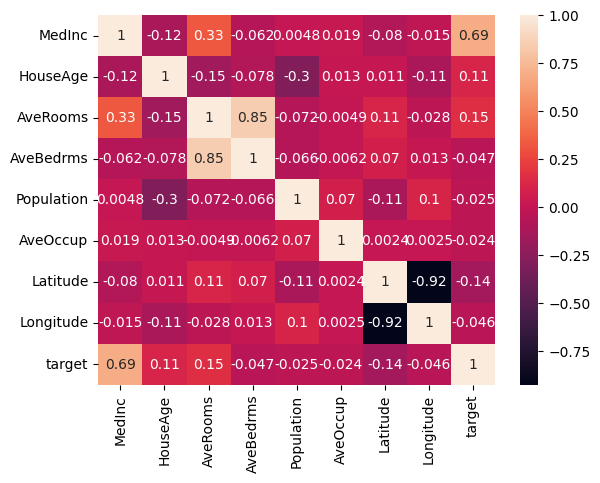

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 1.0, 'Método do Cotovelo')

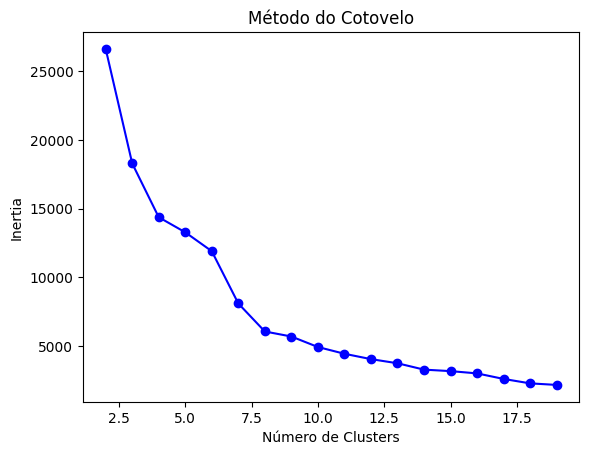

In [8]:
inertias = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(df[["Latitude","Longitude"]])
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')

In [9]:
kmeans = KMeans(n_clusters=7)
df["neighborhood_cluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])

In [10]:
df[df["neighborhood_cluster"]==6]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,neighborhood_cluster
1022,2.4500,17.0,8.973684,1.855263,338.0,2.223684,38.69,-119.78,1.176,6
1023,2.2417,15.0,10.515306,2.372449,573.0,2.923469,38.72,-119.93,0.979,6
1024,3.1500,16.0,29.852941,5.323529,202.0,1.980392,38.52,-120.00,1.406,6
1025,3.4609,14.0,8.625304,1.708029,946.0,2.301703,38.48,-120.56,1.209,6
1026,3.0000,13.0,6.317597,1.197425,1091.0,2.341202,38.45,-120.59,1.190,6
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,6
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,6
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,6
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,6


In [11]:
hipotese1 = df[["MedInc", "target"]].copy()
hipotese2 = df[["MedInc", "HouseAge", "AveRooms","target"]].copy()
hipotese3 = df[["MedInc", "HouseAge", "AveRooms", "Latitude", "Longitude", "target"]].copy()
hipotese4 = df[["MedInc", "HouseAge", "AveRooms", "neighborhood_cluster", "target"]].copy()
hipotese5 = df.copy()

In [12]:
hipotese1["MedIncMinMax"] = (hipotese1["MedInc"] - hipotese1["MedInc"].min()) / (hipotese1["MedInc"].max() - hipotese1["MedInc"].min())
hipotese1["MedIncZscore"] = (hipotese1["MedInc"] - hipotese1["MedInc"].mean()) / hipotese1["MedInc"].std()

##########################################################################################################

hipotese2["MedIncMinMax"] = (hipotese2["MedInc"] - hipotese2["MedInc"].min()) / (hipotese2["MedInc"].max() - hipotese2["MedInc"].min())
hipotese2["MedIncZscore"] = (hipotese2["MedInc"] - hipotese2["MedInc"].mean()) / hipotese2["MedInc"].std()

hipotese2["HouseAgeMinMax"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].min()) / (hipotese2["HouseAge"].max() - hipotese2["HouseAge"].min())
hipotese2["HouseAgeZscore"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].mean()) / hipotese2["HouseAge"].std()

hipotese2["AveRoomsMinMax"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].min()) / (hipotese2["AveRooms"].max() - hipotese2["AveRooms"].min())
hipotese2["AveRoomsZscore"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].mean()) / hipotese2["AveRooms"].std()

############################################################################################################

hipotese3["MedIncMinMax"] = (hipotese3["MedInc"] - hipotese3["MedInc"].min()) / (hipotese3["MedInc"].max() - hipotese3["MedInc"].min())
hipotese3["MedIncZscore"] = (hipotese3["MedInc"] - hipotese3["MedInc"].mean()) / hipotese3["MedInc"].std()

hipotese3["HouseAgeMinMax"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].min()) / (hipotese3["HouseAge"].max() - hipotese3["HouseAge"].min())
hipotese3["HouseAgeZscore"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].mean()) / hipotese3["HouseAge"].std()

hipotese3["AveRoomsMinMax"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].min()) / (hipotese3["AveRooms"].max() - hipotese3["AveRooms"].min())
hipotese3["AveRoomsZscore"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].mean()) / hipotese3["AveRooms"].std()

hipotese3["LatitudeMinMax"] = (hipotese3["Latitude"] - hipotese3["Latitude"].min()) / (hipotese3["Latitude"].max() - hipotese3["Latitude"].min())
hipotese3["LatitudeZscore"] = (hipotese3["Latitude"] - hipotese3["Latitude"].mean()) / hipotese3["Latitude"].std()

hipotese3["LongitudeMinMax"] = (hipotese3["Longitude"] - hipotese3["Longitude"].min()) / (hipotese3["Longitude"].max() - hipotese3["Longitude"].min())
hipotese3["LongitudeZscore"] = (hipotese3["Longitude"] - hipotese3["Longitude"].mean()) / hipotese3["Longitude"].std()

############################################################################################################

hipotese4["MedIncMinMax"] = (hipotese4["MedInc"] - hipotese4["MedInc"].min()) / (hipotese4["MedInc"].max() - hipotese4["MedInc"].min())
hipotese4["MedIncZscore"] = (hipotese4["MedInc"] - hipotese4["MedInc"].mean()) / hipotese4["MedInc"].std()

hipotese4["HouseAgeMinMax"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].min()) / (hipotese4["HouseAge"].max() - hipotese4["HouseAge"].min())
hipotese4["HouseAgeZscore"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].mean()) / hipotese4["HouseAge"].std()

hipotese4["AveRoomsMinMax"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].min()) / (hipotese4["AveRooms"].max() - hipotese4["AveRooms"].min())
hipotese4["AveRoomsZscore"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].mean()) / hipotese4["AveRooms"].std()

hipotese4["NeighClusterMinMax"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].min()) / (hipotese4["neighborhood_cluster"].max() - hipotese4["neighborhood_cluster"].min())
hipotese4["NeighClusterZscore"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].mean()) / hipotese4["neighborhood_cluster"].std()

############################################################################################################

hipotese5["MedIncMinMax"] = (hipotese5["MedInc"] - hipotese5["MedInc"].min()) / (hipotese5["MedInc"].max() - hipotese5["MedInc"].min())
hipotese5["MedIncZscore"] = (hipotese5["MedInc"] - hipotese5["MedInc"].mean()) / hipotese5["MedInc"].std()

hipotese5["HouseAgeMinMax"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].min()) / (hipotese5["HouseAge"].max() - hipotese5["HouseAge"].min())
hipotese5["HouseAgeZscore"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].mean()) / hipotese5["HouseAge"].std()

hipotese5["AveRoomsMinMax"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].min()) / (hipotese5["AveRooms"].max() - hipotese5["AveRooms"].min())
hipotese5["AveRoomsZscore"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].mean()) / hipotese5["AveRooms"].std()

hipotese5["AveBedrmsMinMax"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].min()) / (hipotese5["AveBedrms"].max() - hipotese5["AveBedrms"].min())
hipotese5["AveBedrmsZscore"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].mean()) / hipotese5["AveBedrms"].std()

hipotese5["PopulationMinMax"] = (hipotese5["Population"] - hipotese5["Population"].min()) / (hipotese5["Population"].max() - hipotese5["Population"].min())
hipotese5["PopulationZscore"] = (hipotese5["Population"] - hipotese5["Population"].mean()) / hipotese5["Population"].std()

hipotese5["AveOccupMinMax"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].min()) / (hipotese5["AveOccup"].max() - hipotese5["AveOccup"].min())
hipotese5["AveOccupZscore"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].mean()) / hipotese5["AveOccup"].std()

hipotese5["LatitudeMinMax"] = (hipotese5["Latitude"] - hipotese5["Latitude"].min()) / (hipotese5["Latitude"].max() - hipotese5["Latitude"].min())
hipotese5["LatitudeZscore"] = (hipotese5["Latitude"] - hipotese5["Latitude"].mean()) / hipotese5["Latitude"].std()

hipotese5["LongitudeMinMax"] = (hipotese5["Longitude"] - hipotese5["Longitude"].min()) / (hipotese5["Longitude"].max() - hipotese5["Longitude"].min())
hipotese5["LongitudeZscore"] = (hipotese5["Longitude"] - hipotese5["Longitude"].mean()) / hipotese5["Longitude"].std()

hipotese5.drop(columns=["neighborhood_cluster"],inplace=True)



In [13]:
######################################################################
### Tentativa de fazer a Descida de gradiente no primeiro exemplo ####
######################################################################

In [ ]:
nIteracoes = 100000
α = 0.001 #taxa de aprendizado
theta0 = 0
theta1 = 0

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    hipotese1["MedInc"].values,
    hipotese2["target"].values,
    test_size=0.2,
    random_state=69
)

m = len(X_train)

In [16]:
# Implementação da Descida de Gradiente

for n in range(nIteracoes):
    # Calcular vetor previsões
    previsoes = theta0 + theta1 * X_train

    # Calcular vetor erros
    erros = previsoes - Y_train

    # Calcular derivadas parciais
    derivadaTheta0 = (1/m) * erros.sum()
    derivadaTheta1 = (1/m) * (erros * X_train).sum()

    # Atualizar parâmetros (SUBTRAÇÃO com taxa de aprendizado)
    theta0 = theta0 - α * derivadaTheta0
    theta1 = theta1 - α * derivadaTheta1

In [17]:
previsoes_teste = theta0 + theta1 * X_test

mse = np.mean((previsoes_teste - Y_test)**2)
print(f"Erro quadrático médio no teste: {mse:.2f}")
print(f"RMSE (raiz do erro quadrático médio): {np.sqrt(mse):.2f}")
print(f"\nParâmetros do modelo:")
print(f"theta0 (intercepto): {theta0:.4f}")
print(f"theta1 (coeficiente): {theta1:.4f}")

Erro quadrático médio no teste: 0.69
RMSE (raiz do erro quadrático médio): 0.83

Parâmetros do modelo:
theta0 (intercepto): 0.4568
theta1 (coeficiente): 0.4168


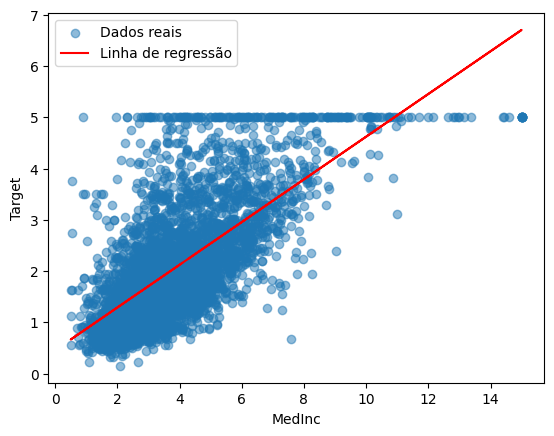

In [18]:
plt.scatter(X_test, Y_test, alpha=0.5, label='Dados reais')
plt.plot(X_test, previsoes_teste, 'r-', label='Linha de regressão')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.legend()
plt.show()

In [1]:
##################################################################
######### Fim da implementação de Descida de Gradiente ##########
##################################################################

In [2]:
# Pensei em implementar algo para fazer as regressões de múltiplas variáveis 
# mas acho melhor começar a brincar com os métodos do scikit-learn afinal de contas
# é uma biblioteca já bastante usada.